# Suyash Pratap Singh

# Task 3:-  Create the Decision Tree classifier and visualize it graphically.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load the iris dataset

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\iris.csv')

# Print the Last five row

In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Print the random eight row 

In [4]:
df.sample(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
6,7,4.6,3.4,1.4,0.3,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Properties and Shape of the dataset

In [5]:
print(df.info())             #full summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [6]:
print(df.describe())    #statistical details of the dataset

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [7]:
print(df.shape)      #shape of dataset

(150, 6)


# Check the data for any null values, count the number of null values in each column

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
print("total number of null values = ",df.isnull().sum().sum())

total number of null values =  0


# BoxPlot

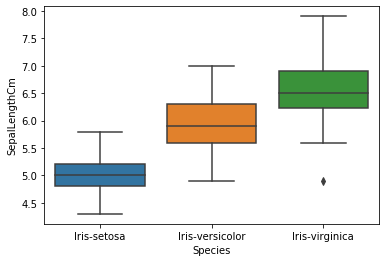

In [10]:
x = sns.boxplot(x="Species", y="SepalLengthCm",data=df)

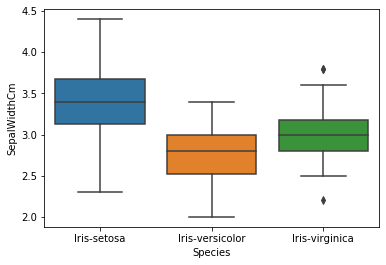

In [11]:
ax = sns.boxplot(x="Species", y="SepalWidthCm",data=df)

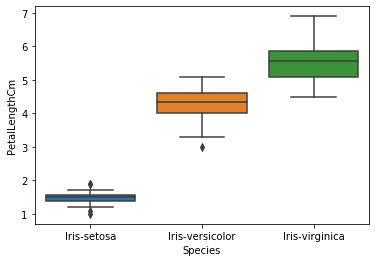

In [12]:
ax = sns.boxplot(x="Species", y="PetalLengthCm",data=df)

# ScatterPlot

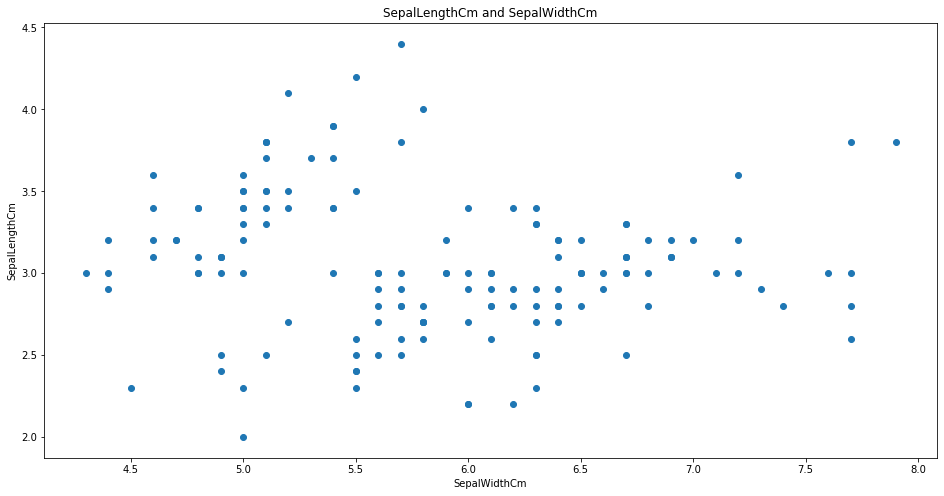

In [13]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(df['SepalLengthCm'],df['SepalWidthCm'])            #Plotting the distribution of scores
plt.title('SepalLengthCm and SepalWidthCm') 
ax.set_ylabel('SepalLengthCm')
ax.set_xlabel('SepalWidthCm')
plt.show()

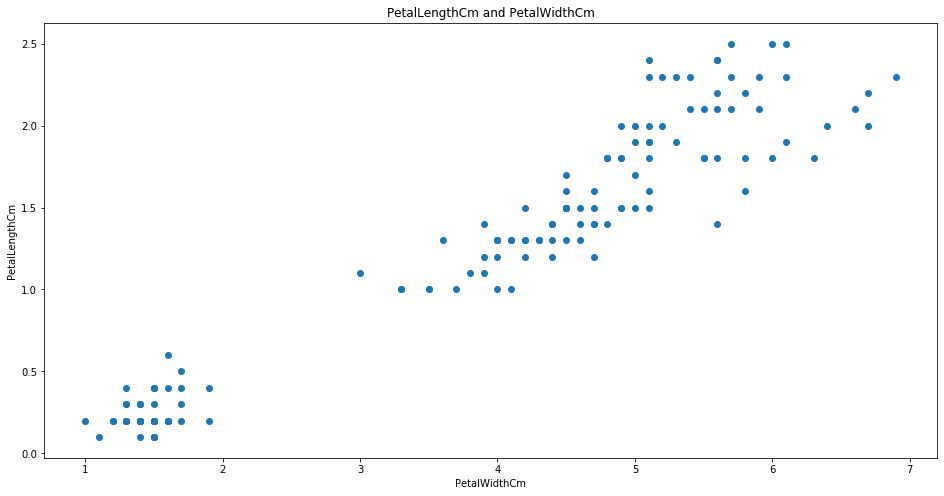

In [14]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(df['PetalLengthCm'],df['PetalWidthCm'])            #Plotting the distribution of scores
plt.title('PetalLengthCm and PetalWidthCm') 
ax.set_ylabel('PetalLengthCm')
ax.set_xlabel('PetalWidthCm')
plt.show()

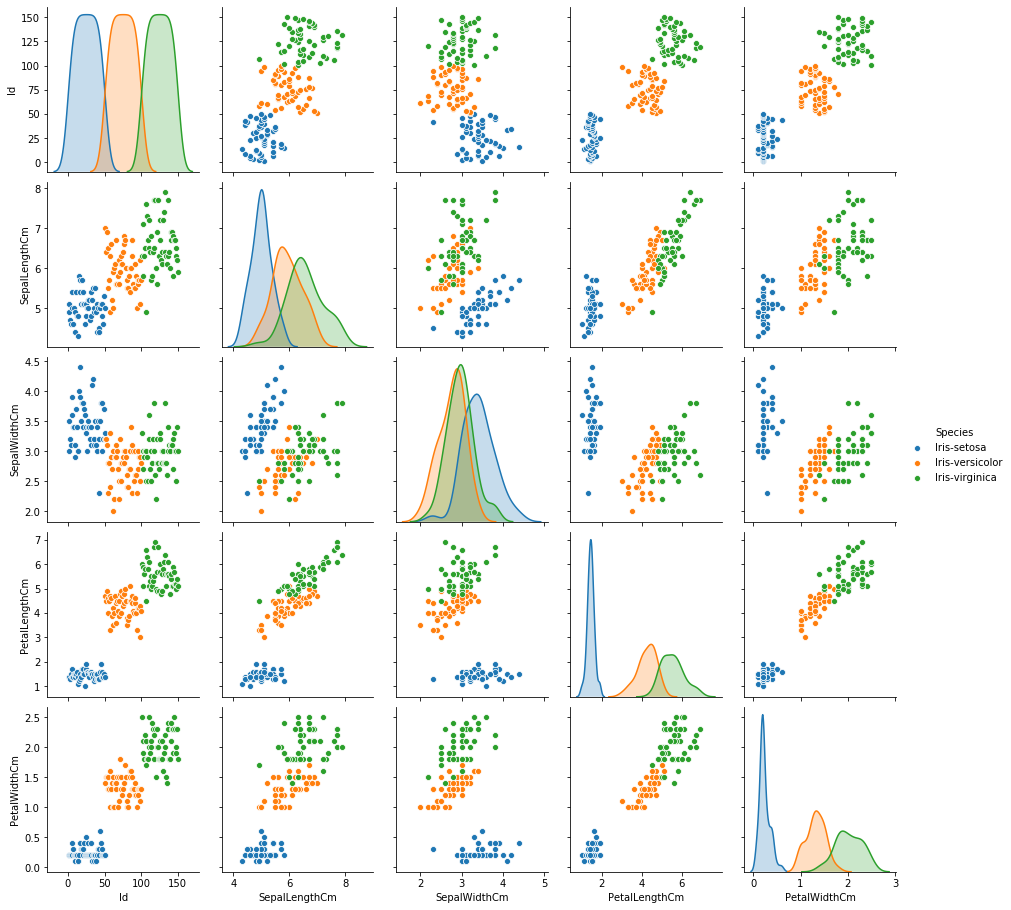

In [15]:
sns.pairplot(df,hue="Species")

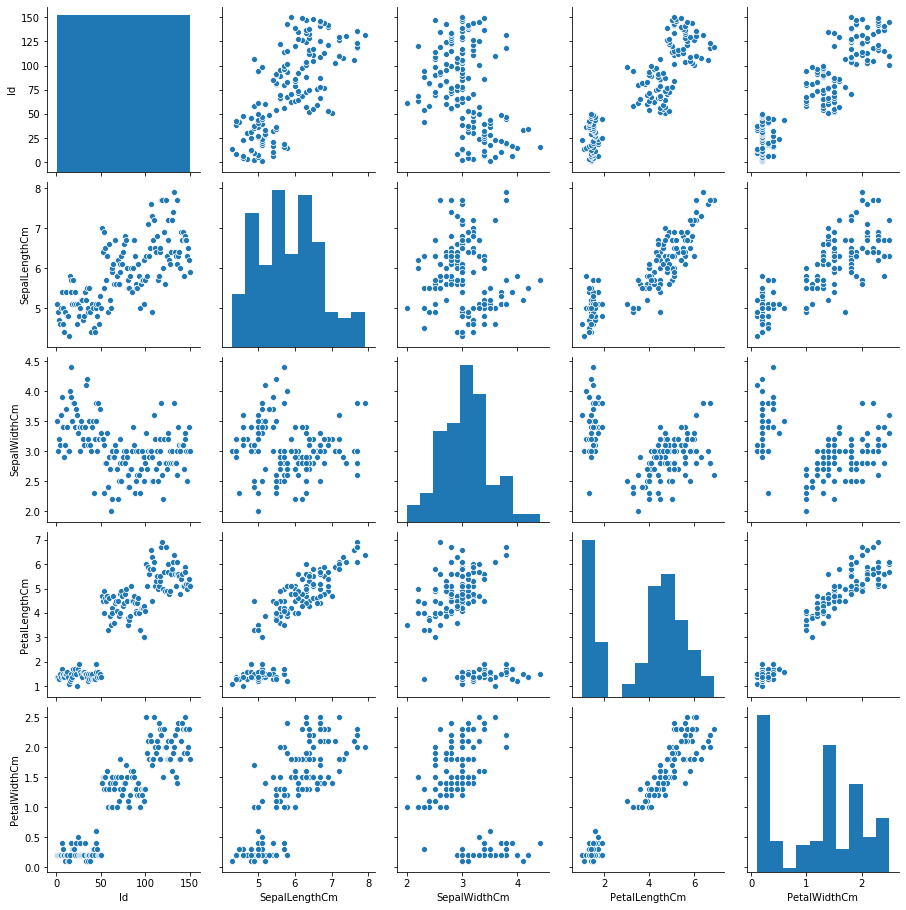

In [16]:
sns.pairplot(df)

In [17]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


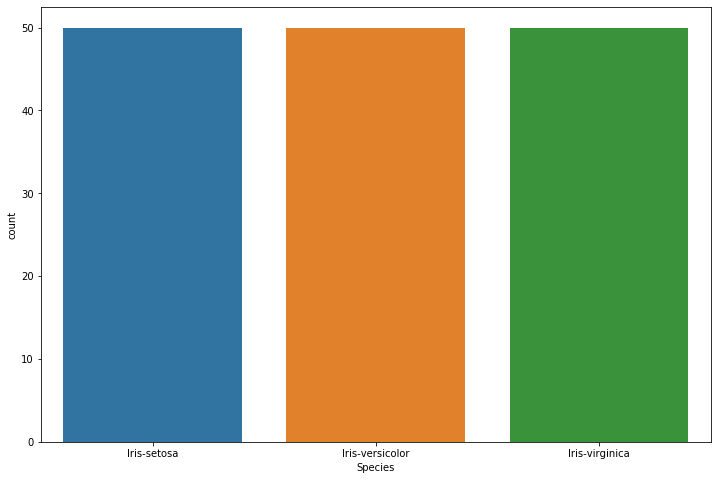

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x='Species',data=df)

# Heatmap

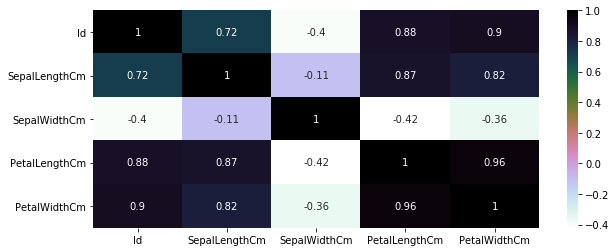

In [19]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap="cubehelix_r")
plt.show()

# Splitting the dataset into training and testing data

In [25]:
X=df.drop('Species',axis=1).values
Y=df['Species'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

# Fitting using Decision Tree Algorithm

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
d_train=dtree.fit(X_train,Y_train)

# Prediction

In [28]:
y_pred=dtree.predict(X_test)

# Accuracy Score

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.9666666666666667

In [30]:
print("Accuracy of Decision Tree on Best Parameters",accuracy_score(Y_test,y_pred))

Accuracy of Decision Tree on Best Parameters 0.9666666666666667


# Evaluating the Algorithm

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [32]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']

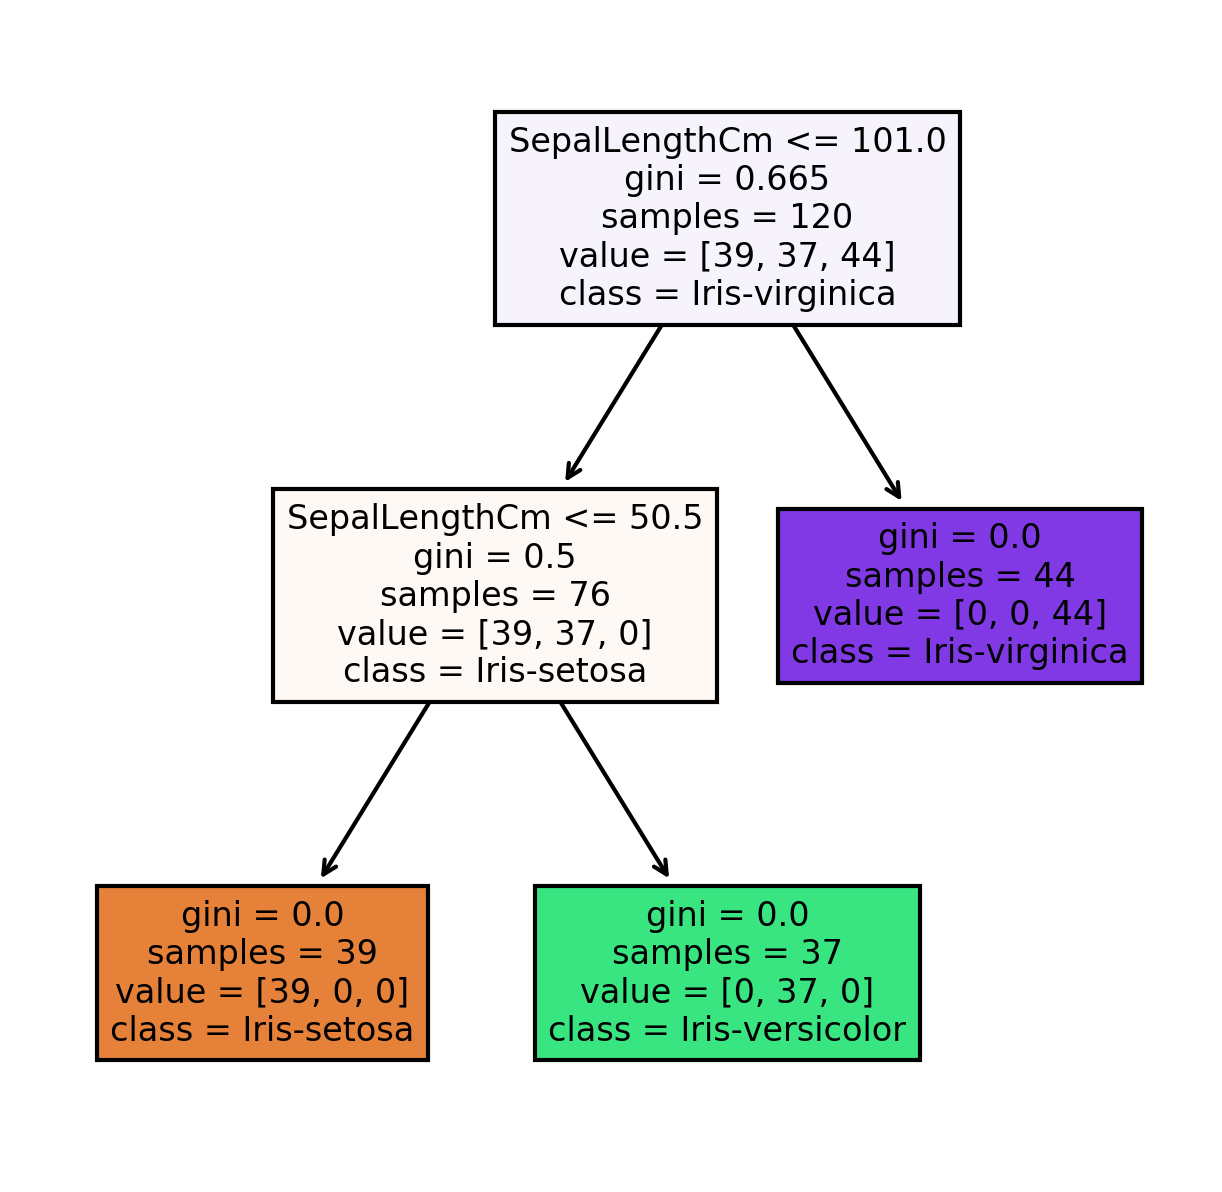

In [42]:
from sklearn.tree import plot_tree
from sklearn import tree
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(dtree,feature_names=features,class_names=targets,filled=True)
fig.savefig(r'C:\Users\Admin\Downloads\Irispic.jpg')
plt.show(fig.savefig)

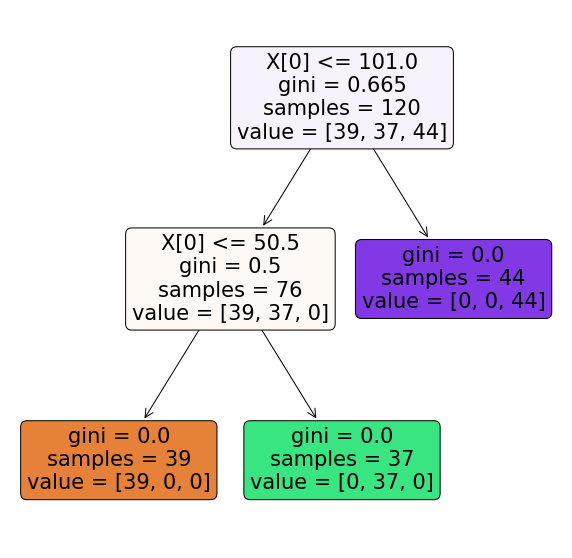

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dtree,rounded=True,filled=True)
plt.show()

# Thank You